In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
import math
import random
from random import uniform

# Exercise 1 : Linear SVM - Influence of parameter C

In [73]:
dataset = pd.read_csv('LineaireNoisy2.csv', delimiter=';')
dataset

,x1,x2,y
0,10.00,5.00,1
1,9.50,10.00,-1
2,2.30,5.25,-1
3,3.40,3.88,-1
4,7.66,4.46,-1
...,...,...,...
147,15.01,15.67,1
148,16.05,14.70,1
149,15.65,18.23,1
150,18.85,17.43,1


As you can see, we have here 152 examples described by 2 numerical variables (x1 and x2) and 1 categorical target variable (y).
Question : What are the possible values for y ? How many examples for each possible values of y ?

In [74]:
dataset['y'].unique()

array([ 1, -1])

In [75]:
dataset['y'].value_counts()

y
 1    76
-1    76
Name: count, dtype: int64

The possible values are 1 and -1 and half of the data has -1 and half has 1.

Question : Plot this dataset in a (x1, x2) plane, with different colors for the values of y.

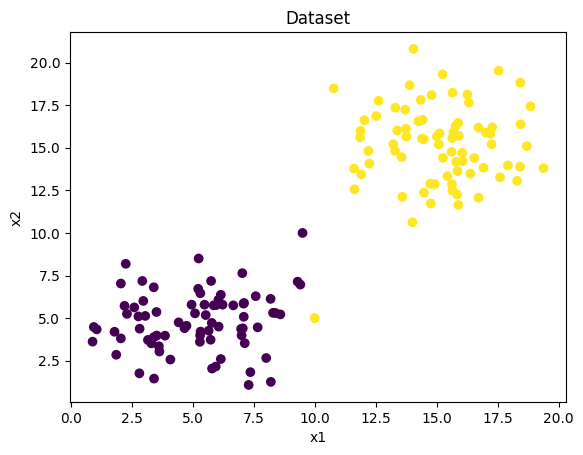

In [76]:
plt.scatter(dataset['x1'], dataset['x2'], c=dataset['y'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Dataset')
plt.show()


Question : Is this dataset linearly separable ? Find some examples that are close to the boundary.

Yes, this is separable.

## Fitting a linear SVM to this dataset

In [77]:
from sklearn import svm

In [78]:
model_svm = svm.SVC(C = 1000, kernel = 'linear')
# here SVC stands for Support Vector Classification (there are other kinds of SVM),and we ask for a linear kernel
# The parameter C is set to 1000

In [79]:
model_svm.fit(dataset.iloc[:,0:2], dataset.y)
# here we ask to fit the model using the features (x1 and x2) and the target (y)

,C,1000
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In the CM, you have seen that when fitting a SVC model, some support vectors are identified and one coefficient (called weight or Lagrange coefficient) is associated to each support vector. In addition, one more parameter is also estimated: the constant of the model.
We can find these informations bt the following commands:

In [80]:
model_svm.support_vectors_
# the support vectors found by the SVC. Here 3 support vectors, called sv1, sv2 and sv3

array([[ 9.41,  6.97],
       [10.  ,  5.  ],
       [10.78, 18.49]])

In [81]:
model_svm.support_
# the index of the support vectors in the dataset. you can check 

array([ 61,   0, 102], dtype=int32)

In [82]:
model_svm.dual_coef_
# the lagrange coefficients associated to the support vectors (w1, w2 and w3)

array([[-4.04838982,  3.46935572,  0.5790341 ]])

In [83]:
model_svm.intercept_
# the constant of the model (w0)

array([-26.58177221])

When a model is fitted, it can be used to make some predictions. We'll recall the decision process of a SVC here.
For an example described by a feature vector x (here with 2 features), the model computes:
h(x) = w1* (sv1.x) + w2*(sv2.x) + w3 * (sv3.x) + w0 
here there is 3 support vectors, so three terms in this formula, plus the constant
then if h(x) > 0, it predicts y = 1, otherwise it predicts y = -1 (here it is binary classification)
You can obtain the h(x) values for the examples in the dataset by the following command:

In [84]:
model_svm.decision_function(dataset.iloc[:,0:2])

array([  0.99940407,  -1.24148389, -20.91114918, -17.56203656,
        -5.55801067, -10.10889154,  -3.90822106, -21.76685665,
       -10.39666304, -18.76130279, -13.09448448, -15.41565599,
       -22.18728362,  -3.62255982, -16.27032034, -17.78695937,
        -7.43350422, -17.49256868, -17.13473082,  -7.38326661,
       -19.5516331 , -12.85908729, -16.87859157, -18.21741848,
        -4.32685023, -10.06558557,  -6.0540296 , -12.56078853,
       -12.99192542, -11.72582313,  -7.3553862 , -12.18372041,
        -7.47457014, -24.64741494, -10.16024918, -18.04301931,
       -14.80785344, -21.27232307,  -1.34003152, -17.23762877,
        -7.28068112, -13.86615894, -19.43865014, -10.60139177,
        -7.27870065, -10.47191611,  -5.97833429, -10.88212828,
        -3.49899913, -12.14974236,  -4.26845759, -20.12147022,
       -11.9679693 , -11.42929574, -14.07039256, -24.64824895,
        -6.91064799, -19.1329775 , -16.77089868,  -8.609971  ,
        -9.54137378,  -0.99970304, -10.91975481,  -7.86

Question : what are the decisions (predictions of y) for the 2 first examples of the dataset ? Are these decisions correct ?

In [85]:
# 1) Extract X from the first two rows
X_first2 = dataset.iloc[:2, 0:2].values  # shape (2, n_features)

X_first2


array([[10. ,  5. ],
       [ 9.5, 10. ]])

In [86]:
# 2) Get decision scores (signed distance to the hyperplane)
scores = model_svm.decision_function(X_first2)  # array shape (2,)
scores

/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([ 0.99940407, -1.24148389])

In [87]:
# 3) Generate predictions from the sign (this assumes labels are {1, -1})
preds_sign = np.where(scores > 0, 1, -1)
preds_sign

array([ 1, -1])

In [88]:
#4) Get true labels
y_true = dataset['y'].iloc[:2].values
y_true

array([ 1, -1])

The decisions for the first two samples are correct as we can see when we compare the preds_sign(predicted signs of the model) with the real labels(y_true)

Question : what are the decision values for the 3 support vectors ? Was it expected ?

In [89]:
# Get the support vectors
support_vectors = model_svm.support_vectors_

# Calculate decision values for support vectors
decision_values_sv = model_svm.decision_function(support_vectors)

print(decision_values_sv)



[-0.99970304  0.99940407  1.00026691]


/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


They are the expected values because they are close to ±1, due to they are close to the margins.

Question : using the score function applied to svm_model on dataset, compute the prediction score on this dataset (same use of score function than previous algorithms). 

In [90]:
# 1. Extract X and y
X = dataset.iloc[:, 0:2].values   # features
y = dataset['y'].values           # labels

# 2. Compute prediction score (accuracy)
score = model_svm.score(X, y)

# 3. Display result
print(f"Prediction score (accuracy) on this dataset: {score:.4f}")


Prediction score (accuracy) on this dataset: 1.0000


/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Run the following cells to see a plot of your dataset together with the decision boundary and the margins.
Question : Does this boundary seem adapted to the dataset ?

In [91]:
def svm_draw(model_svm, xmin, xmax, dataset):
    
    color_map = matplotlib.colors.ListedColormap(pd.Series(['blue', 'red']))


    plt.figure(figsize=(10, 8))
    # Plotting our two-features-space
    plt.scatter(dataset.iloc[:,0], dataset.iloc[:,1], c = dataset.y, cmap = color_map, marker='+')
    # Constructing a hyperplane using a formula.
    w = model_svm.coef_[0]           # w consists of 2 elements
    b = model_svm.intercept_[0]      # b consists of 1 element
    x_points = np.linspace(xmin, xmax)    # generating x-points from -1 to 1
    y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points

    plt.plot(x_points, y_points, c='g');

    plt.scatter(model_svm.support_vectors_[:, 0],
                model_svm.support_vectors_[:, 1], 
                s=50, 
                facecolors='none', 
                edgecolors='k', 
                alpha=1);

    # Step 2 (unit-vector):
    w_hat = model_svm.coef_[0] / (np.sqrt(np.sum(model_svm.coef_[0] ** 2)))
    # Step 3 (margin):
    margin = 1 / np.sqrt(np.sum(model_svm.coef_[0] ** 2))
    # Step 4 (calculate points of the margin lines):
    decision_boundary_points = np.array(list(zip(x_points, y_points)))
    points_of_line_above = decision_boundary_points + w_hat * margin
    points_of_line_below = decision_boundary_points - w_hat * margin
    # Plot margin lines
    # Blue margin line above
    plt.plot(points_of_line_above[:, 0], 
             points_of_line_above[:, 1], 
             'g--', 
             linewidth=2)
    # Green margin line below
    plt.plot(points_of_line_below[:, 0], 
             points_of_line_below[:, 1], 
             'g--',
             linewidth=2)

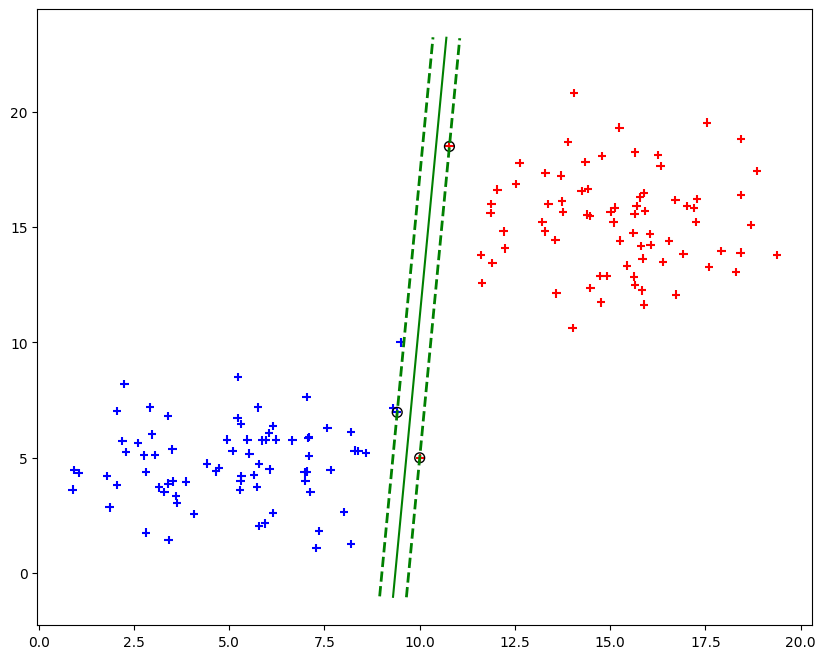

In [92]:
svm_draw(model_svm, 9.3, 10.7, dataset)

In [93]:
# fit a model with C = 1
model_svm = svm.SVC(C = 1, kernel = 'linear')
model_svm.fit(dataset.iloc[:,0:2], dataset.y)
# Get the support vectors
support_vectors = model_svm.support_vectors_
support_vectors
# the support vectors found by the SVC. Here 4 support vectors, called sv1, sv2, sv3 and sv4




array([[ 9.5 , 10.  ],
       [ 9.41,  6.97],
       [10.  ,  5.  ],
       [10.78, 18.49]])

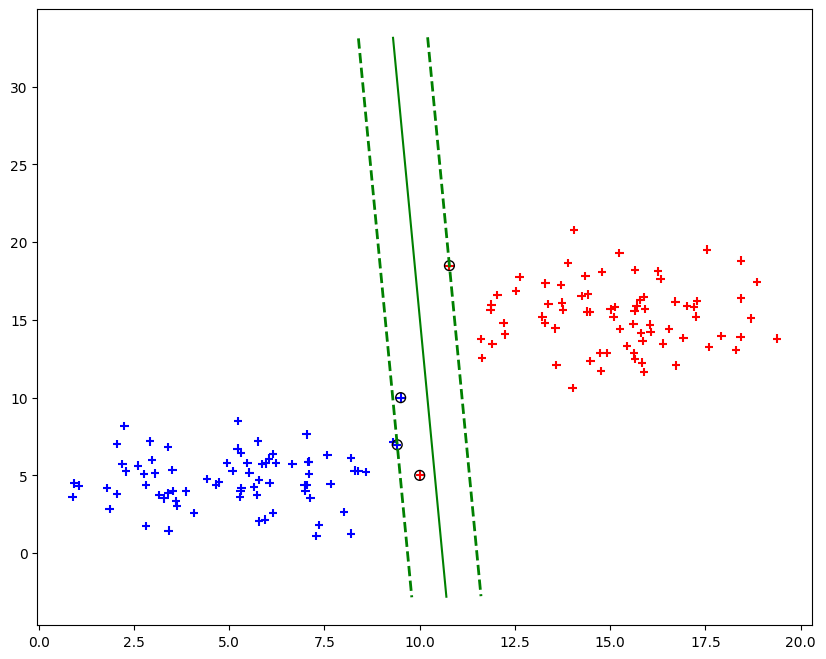

In [94]:
# Plot the new boundary and margins
svm_draw(model_svm, 9.3, 10.7, dataset)
# How many points are inside the margins ? on the margins ?
# There are 2 points inside the margins and 2 on the margins.


In [95]:
# How many points from the dataset are misclassified ?
#just 1 point is misclassified.
# What are the values of h(x) for the support vectors ?
model_svm.decision_function(dataset.iloc[:,0:2])

array([ -0.43553644,  -0.77124977,  -8.89260688,  -7.74159938,
        -3.03198842,  -4.78981348,  -2.30276606,  -9.47926821,
        -4.73314161,  -8.07296277,  -5.52026292,  -7.04990094,
        -9.49842957,  -2.1932232 ,  -7.23187758,  -7.86698876,
        -3.61028944,  -7.55724499,  -7.83467545,  -3.58658208,
        -8.38216681,  -5.61849182,  -7.53335908,  -8.01238266,
        -2.37761785,  -5.02199746,  -3.58364186,  -5.5306532 ,
        -5.8231273 ,  -5.34353714,  -3.77792731,  -5.64743664,
        -3.78364671, -10.42119227,  -4.61075021,  -7.61611196,
        -6.58263301,  -8.98244864,  -1.11368147,  -7.60535116,
        -3.70538206,  -6.23929106,  -8.11712977,  -4.84539246,
        -3.63227025,  -5.19209358,  -3.47454071,  -4.95622016,
        -2.57519538,  -5.67470857,  -2.72418069,  -8.54641865,
        -5.37239734,  -5.0159437 ,  -6.33326396, -10.51301032,
        -3.65466592,  -8.12325062,  -7.52464168,  -4.07645106,
        -4.77221355,  -0.99999406,  -5.18569615,  -3.58

In [96]:
model_svm = svm.SVC(C = 0.01, kernel = 'linear')
model_svm.fit(dataset.iloc[:,0:2], dataset.y)
# Get the support vectors
support_vectors = model_svm.support_vectors_
support_vectors.shape
# the support vectors found by the SVC. Here 12 support vectors


(12, 2)

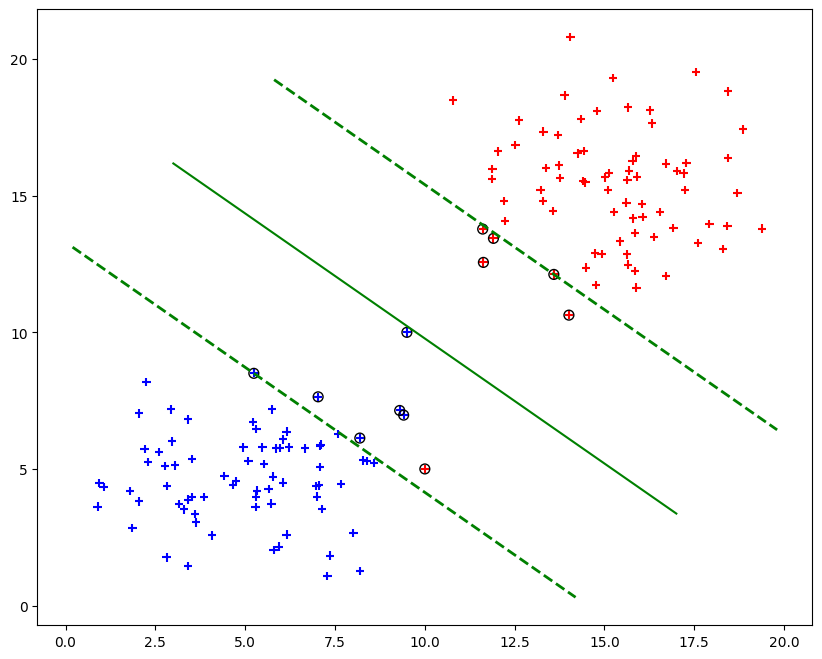

In [97]:
svm_draw(model_svm, 3, 17, dataset)

In [98]:
#How many points are inside the margins ? on the margins ?
#How many points from the dataset are misclassified ?
#There are 8 points inside the margins and 4 on the margins.
#There are 1 points from the dataset are misclassified.
#What are the values of h(x) for the support vectors ?
model_svm.decision_function(dataset.iloc[:,0:2])


array([-0.84781671, -0.04123122, -2.05496778, -2.11944796, -1.32404429,
       -1.5770025 , -1.07070997, -2.55265476, -1.29806584, -1.95437267,
       -1.00000013, -2.24153991, -2.32431169, -1.05623187, -2.02869902,
       -2.1996273 , -1.17149285, -1.83876381, -2.54931989, -1.16113925,
       -2.00521048, -1.31932712, -2.17942753, -2.18686846, -0.94135564,
       -2.01202301, -1.98437309, -1.35086712, -1.5961592 , -1.5423995 ,
       -1.5147778 , -1.79109266, -1.45055161, -2.41274927, -1.23031646,
       -1.59916518, -1.79917234, -1.98776326, -0.58159166, -2.08218629,
       -1.43384681, -1.78267432, -1.60985688, -1.36774125, -1.30659707,
       -2.05771225, -1.83981723, -1.38754649, -1.8045006 , -1.86019499,
       -1.58678357, -1.93872938, -1.44220815, -1.15149928, -1.8205373 ,
       -2.57358716, -1.57533046, -1.81111332, -2.23122375, -1.25751596,
       -1.8997588 , -0.59389952, -1.76736969, -0.86176782, -2.12493463,
       -1.32192992, -1.52835337, -2.35130443, -1.7487763 , -1.03

### SVM Decision Function and the Effect of C

#### 1. Decision Function (`model_svm.decision_function(X)`)
- Computes the signed distance of each point to the SVM decision boundary:  
  \[
  f(x) = w \cdot x + b
  \]  
- Positive values → class +1, negative → class -1.  
- The magnitude indicates how far the point is from the hyperplane.

### 2. Role of C in SVM
- `C` is the **regularization parameter** controlling the trade-off between **margin width** and **classification errors**.  
- **Large C** → penalizes misclassifications heavily → narrower margin, tries to classify all points correctly → larger weights `w`.  
- **Small C** → allows misclassifications → wider margin, softer decision boundary → smaller weights `w`.

### 3. Effect on Decision Function
- Changing `C` alters `w` and `b`, which directly affects the `decision_function` values:  
  - Large C → decision function values have larger magnitude, boundary closely fits data.  
  - Small C → decision function values have smaller magnitude, boundary smoother with wider margin.

### 4. Effect on Visualization (`svm_draw`)
- The slope and position of the decision line depend on `w` and `b`.  
- The margin width is computed as \( 1 / \|w\| \).  
- Therefore:  
  - **High C** → narrower margin, line fits data tightly.  
  - **Low C** → wider margin, line is smoother and allows some misclassified points.


# Exercise 2: Choosing C using train/val/test split

In [99]:
# Load the dataset
dataset = pd.read_csv("spam7.csv", decimal=",", index_col=0, delimiter = ";")
dataset
# A description about this dataset is given here:
# http://math.furman.edu/~dcs/courses/math47/R/library/DAAG/html/spam7.html

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,y
1,1028,0.180,0.372,0.43,0.43,0.21,y
2,2259,0.184,0.276,0.06,1.16,0.06,y
3,191,0.000,0.137,0.00,0.00,0.00,y
4,191,0.000,0.135,0.00,0.00,0.00,y
...,...,...,...,...,...,...,...
4596,88,0.000,0.000,0.00,0.00,0.31,n
4597,14,0.000,0.353,0.00,0.00,0.00,n
4598,118,0.000,0.000,0.00,0.00,0.30,n
4599,78,0.000,0.000,0.00,0.00,0.96,n


In [100]:
dataset['yesno'].value_counts()

yesno
n    2788
y    1813
Name: count, dtype: int64

The database has 4601 examples, with 6 features and yesno which is the target column shows 2788 samples classified as no and 1813 classified as yes

In [101]:
from sklearn.preprocessing import StandardScaler
# First, get the features
X = dataset.iloc[:,0:6]
# then create a scaler on X
scaler = StandardScaler().fit(X)
# Apply it to X
X = scaler.transform(X)
# create a dataframe with X
X = pd.DataFrame(X, columns=dataset.columns[0:6])
X
# You should see that the features have been transformed
print(X.dollar.mean())
# the mean of feature 'dollar' is now 0 (very close to 0)
# it is the same for the other features

-2.470915838331146e-17


In [102]:
# Now we will add the target variable inside X -- WHY?
#X['yesno'] = dataset.yesno
#X
# now our dataset is called X

In [103]:
xtrain, xtest, ytrain, ytest = train_test_split(X, dataset.yesno, test_size=0.2, random_state=42)
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.25, random_state=42)

Here 20% goes to test and 80% to training. From that porcentage of training 25% goes to validation. Which in the end means 20% testing, 20% validation and 60% training

In [114]:
svm_model = svm.SVC(C=1, kernel='linear')
train_model = svm_model.fit(xtrain, ytrain)
# Get support vectors
support_vectors = svm_model.support_vectors_
support_vectors.shape
# the support vectors found by the SVC. Here 1100 support vectors


(1100, 6)

In [115]:
xtrain.shape

(2760, 6)

In [116]:
ytrain.shape

(2760,)

In [117]:
train_score = train_model.score(xtrain, ytrain)
print("Training set accuracy:", train_score)

val_score = train_model.score(xval, yval)
print("Validation set accuracy:", val_score)


Training set accuracy: 0.8452898550724638
Validation set accuracy: 0.8597826086956522


In [118]:
ypredval = svm_model.predict(xval)


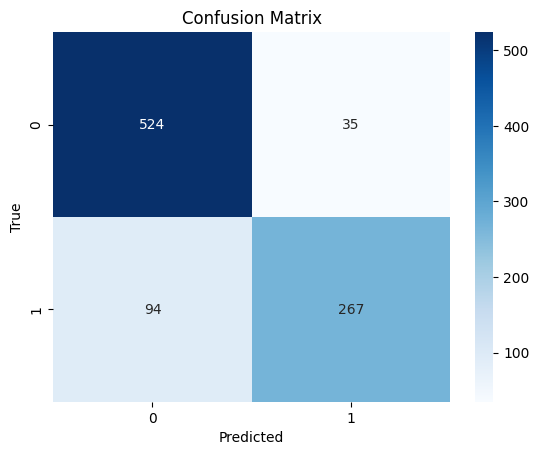

In [120]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion_matrix(yval, ypredval)

sns.heatmap(confusion_matrix(yval, ypredval), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Exercise 3: Non-linear SVM

In [131]:
# Load a dataset
dataset = pd.read_csv("SepNonLineaire.csv")
dataset


,x1,x2,y
0,1.5,4.0,1
1,1.0,2.0,1
2,0.0,0.0,1
3,1.0,4.0,1
4,0.5,3.0,1
...,...,...,...
145,-2.8,-3.3,0
146,-2.8,1.0,0
147,-2.8,3.0,0
148,-2.4,3.0,0


In [132]:
dataset['y'].value_counts()

y
0    105
1     45
Name: count, dtype: int64

There are 150 examples, with 2 features. For the target values we have 105 examples with 0 and 45 with 1. 

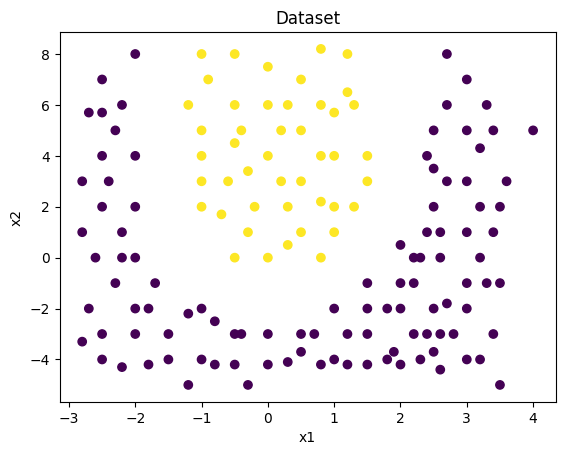

In [129]:
plt.scatter(dataset['x1'], dataset['x2'], c=dataset['y'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Dataset')
plt.show()

In [133]:
X = dataset.iloc[:,0:2]
X

,x1,x2
0,1.5,4.0
1,1.0,2.0
2,0.0,0.0
3,1.0,4.0
4,0.5,3.0
...,...,...
145,-2.8,-3.3
146,-2.8,1.0
147,-2.8,3.0
148,-2.4,3.0


In [134]:
#split the dataset into training/validation/test
xtrain, xtest, ytrain, ytest = train_test_split(X, dataset.y, test_size=0.2, random_state=42)
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.25, random_state=42)


In [135]:
rbf_model = svm.SVC(C=1, kernel='rbf', gamma=10)
rbf_model.fit(xtrain, ytrain)

train_score = rbf_model.score(xtrain, ytrain)
print("Training set accuracy:", train_score)



Training set accuracy: 1.0


In [136]:
val_score = rbf_model.score(xval, yval)
print("Validation set accuracy:", val_score)

Validation set accuracy: 0.7666666666666667


In [137]:
def draw_boundary(model, data, x_min, x_max, y_min, y_max):
    h = 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    zz = np.c_[xx.ravel(), yy.ravel()]
    zz = pd.DataFrame(zz)
    zz2 = zz
    pred_zz= pd.Series(model.predict(zz2))
    color_map = matplotlib.colors.ListedColormap(pd.Series(['blue', 'red']))
    fig = plt.figure(figsize=  (8,8))
    fig = plt.scatter(zz.iloc[:,0], zz.iloc[:,1], c = pred_zz, cmap = color_map, marker='+')
    fig = plt.scatter(data.iloc[:,0], data.iloc[:,1], s = 50, c = data.iloc[:,2], cmap = color_map)
    

/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


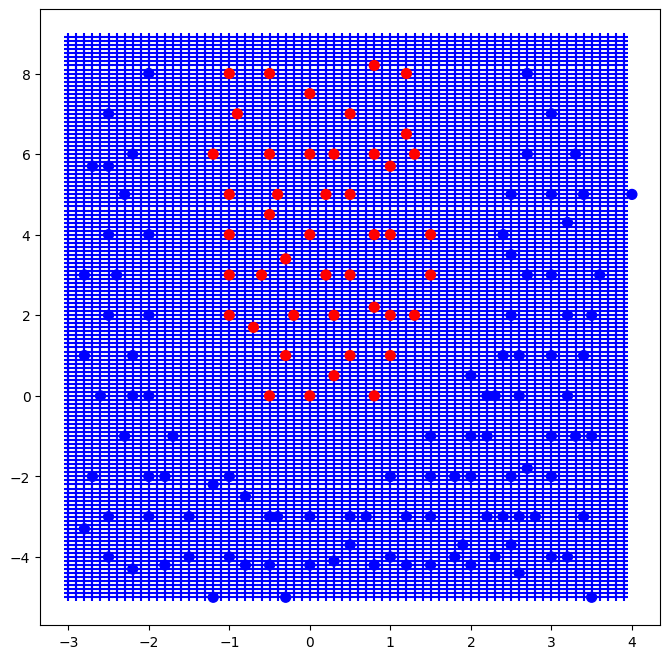

In [139]:
draw_boundary(model_svm, dataset, -3,4,-5,9)

In [140]:
def draw_boundary(model, data, x_min, x_max, y_min, y_max):
    h = 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    zz = np.c_[xx.ravel(), yy.ravel()]
    zz = pd.DataFrame(zz)
    zz2 = zz
    pred_zz= pd.Series(model.predict(zz2))
    color_map = matplotlib.colors.ListedColormap(pd.Series(['blue', 'red']))
    fig = plt.figure(figsize=  (8,8))
    fig = plt.scatter(zz.iloc[:,0], zz.iloc[:,1], c = pred_zz, cmap = color_map, marker='+')
    fig = plt.scatter(data.iloc[:,0], data.iloc[:,1], s = 50, c = data.iloc[:,2], cmap = color_map)

/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


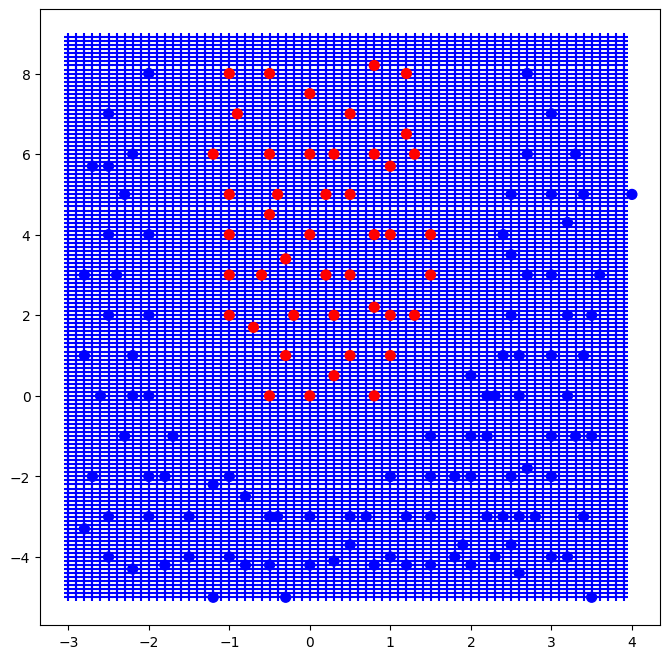

In [141]:
draw_boundary(model_svm, dataset, -3,4,-5,9)

I dont understand what are the decision boundaries here